# Customer Churn prediction

# Part 1 - DEFINE

### ---- Define the problem ----

The problem is to develop a ML model which will predict the probability of churn of customers. The model will learn from existing data of churned and norn churned customers which has some features and the target variable which is the 'Churn' column. We also want to see which features has the highest impact on churn and which has the lowest impact.

In [149]:
#Import all the necessary libraries
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
raw_df=pd.read_csv('TelecomCustomer_data.csv')

In [4]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
raw_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
raw_df.duplicated().sum()

0

In [7]:
raw_df.loc[(raw_df.Churn=='Yes'),'Churn']=1
raw_df.loc[(raw_df.Churn=='No'),'Churn']=0

raw_df.Churn=raw_df.Churn.astype('category')

In [8]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [9]:
raw_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

In [10]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
raw_df['TotalCharges']=pd.to_numeric(raw_df['TotalCharges'],errors='coerce').fillna(0).astype(int)

In [12]:
raw_df.TotalCharges.dtype

dtype('int32')

In [13]:
raw_df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.265086
std,0.368612,24.559481,30.090047,2266.790864
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.000000
50%,0.000000,29.000000,70.350000,1394.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [14]:
raw_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,2273-QCKXA,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [15]:
raw_df=shuffle(raw_df).reset_index(drop=True)

In [16]:
train_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=42)

In [17]:
train_df.shape

(5634, 21)

In [18]:
test_df.shape

(1409, 21)

In [19]:
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
num_cols=['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']
cat_cols=['customerID', 'gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
          'Contract', 'PaperlessBilling','PaymentMethod']

In [21]:
train_df.gender.value_counts()

Male      2845
Female    2789
Name: gender, dtype: int64

# 2. Explore

## EDA

In [22]:
#test=train_df[['tenure','Churn']]

In [23]:
#test.head(10)

In [24]:
#test['Churn']=pd.to_numeric(test['Churn'])

In [25]:
#grp=test.groupby(['Churn','gender'])[['gender']].count().rename(columns={'gender':'count'})

In [26]:
#grp

In [27]:
#a=pd.crosstab(train_df['tenure'].mean(),train_df['Churn'])

In [28]:
#a

In [29]:
#train_df['gender'].dtype

In [30]:
def plot_figure(df,col):
    fig=plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    
    if df[col].dtype=='O':
        df[col].value_counts().sort_index().plot(kind='bar',ax=ax1)
        plt.xticks(rotation=45)
    else:
        df[col].value_counts().sort_index().plot()
        #sns.boxplot(df[col])
        
    ax2=plt.subplot(1,2,2)
    
    if df[col].dtype=='O':
        pd.crosstab(train_df[col],df['Churn']).plot(kind="bar",stacked=True,ax=ax2)
        plt.xticks(rotation=360)
    else:
        #plt.plot(train_df.groupby('Churn')[col].mean())
        #ax2.invert_yaxis()
        sns.boxplot(x=col,y='Churn',data=train_df)
        
    plt.show()

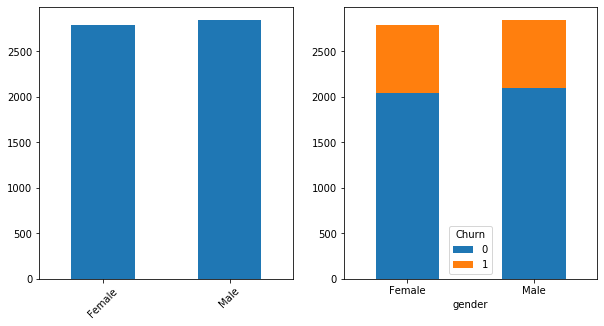

In [31]:
plot_figure(train_df,'gender')

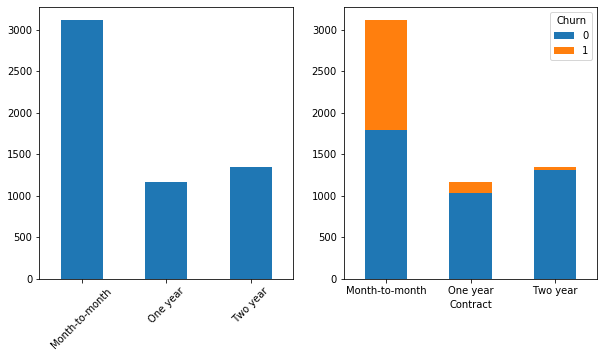

In [32]:
plot_figure(train_df,'Contract')

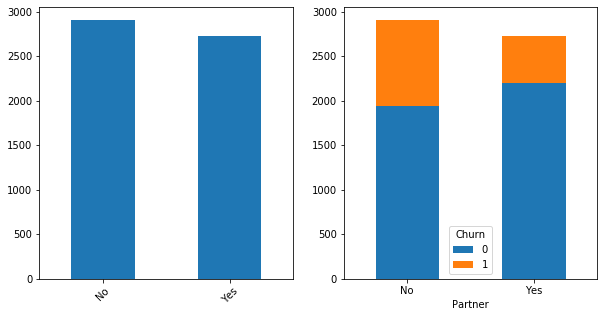

In [33]:
plot_figure(train_df,'Partner')

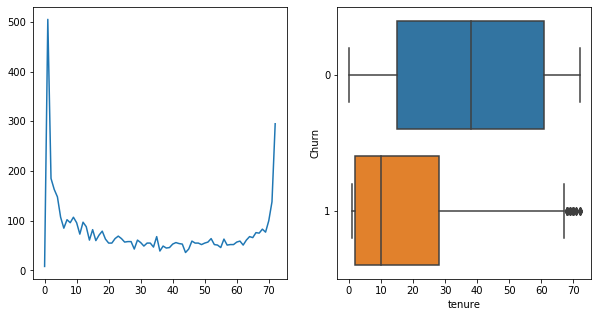

In [34]:
plot_figure(train_df,'tenure')

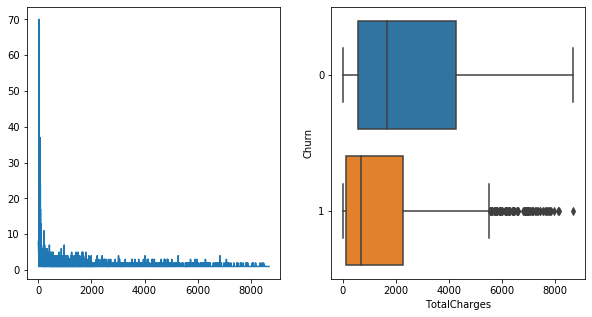

In [35]:
plot_figure(train_df,'TotalCharges')

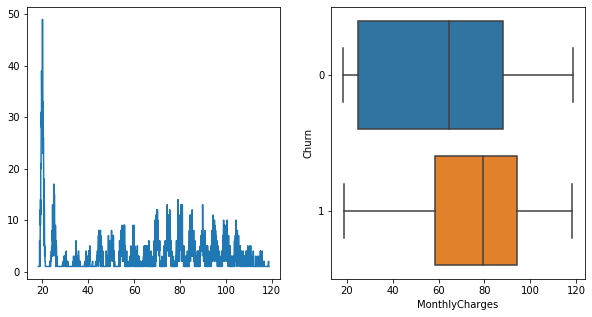

In [36]:
plot_figure(train_df,'MonthlyCharges')

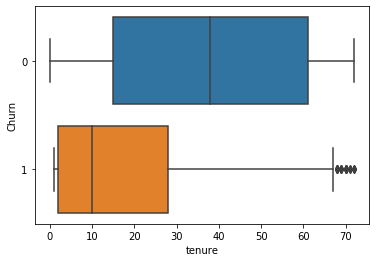

In [37]:
sns.boxplot(x='tenure',y='Churn',data=train_df)

In [38]:
num_df=train_df[num_cols + ['Churn']].astype(np.int64)

In [39]:
num_df.head(4)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
2142,36,0,19,702,0
1623,42,0,100,4222,0
6074,66,1,100,6871,1
1362,10,0,74,799,1


In [40]:
corr=num_df.corr()

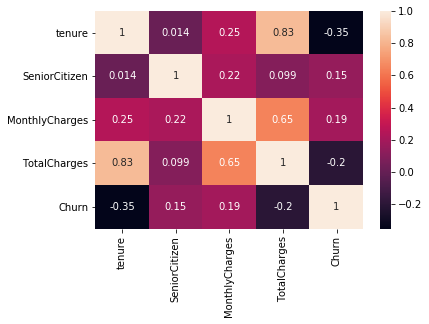

In [41]:
sns.heatmap(corr,annot=True)

### Model Selection 

In [42]:
train_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,7168-HDQHG,Female,0,Yes,Yes,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.20,702,0
1623,2800-QQUSO,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,100.30,4222,0
6074,2632-UCGVD,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,6871,1
1362,8065-YKXKD,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.75,799,1
6754,0419-YAAPX,Male,0,Yes,No,49,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.30,4297,0


In [43]:
test_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,3803-KMQFW,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.55,20,1
2715,0670-KDOMA,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20,0
3825,0704-VCUMB,Female,0,Yes,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278,0
1807,9903-LYSAB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.15,1305,0
132,9938-ZREHM,Female,0,Yes,No,37,Yes,Yes,DSL,No,...,No,Yes,No,Yes,One year,No,Mailed check,72.10,2658,0


In [45]:
train_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges           int32
Churn               category
dtype: object

In [46]:
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,7168-HDQHG,Female,0,Yes,Yes,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.20,702,0
1623,2800-QQUSO,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,100.30,4222,0
6074,2632-UCGVD,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,6871,1
1362,8065-YKXKD,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.75,799,1
6754,0419-YAAPX,Male,0,Yes,No,49,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.30,4297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0788-DXBFY,Male,0,Yes,Yes,58,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.55,1108,0
5191,1757-TCATG,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.05,746,0
5226,0187-QSXOE,Male,1,Yes,No,7,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.00,605,0
5390,9225-BZLNZ,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083,0


In [48]:
cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
          'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

num_vars=['tenure','MonthlyCharges', 'TotalCharges']

##### Encode training set and test set

In [49]:
#Training set
cat_var_train=pd.get_dummies(train_df[cat_vars])
num_vars_train=pd.get_dummies(train_df[num_vars])
training_set=pd.concat([num_vars_train,cat_var_train],axis=1)

In [50]:
training_set=training_set.reset_index(drop=True)

In [51]:
training_set.head(10)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,36,19.20,702,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,42,100.30,4222,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,66,100.05,6871,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
3,10,74.75,799,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,49,85.30,4297,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
5,38,70.60,2708,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
6,3,20.55,57,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
7,63,90.05,5817,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
8,1,19.90,19,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
9,54,109.55,6118,0,0,1,0,1,1,0,...,1,1,0,0,1,0,0,0,1,0


In [109]:
test_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,3803-KMQFW,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.55,20,1
2715,0670-KDOMA,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20,0
3825,0704-VCUMB,Female,0,Yes,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278,0
1807,9903-LYSAB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.15,1305,0
132,9938-ZREHM,Female,0,Yes,No,37,Yes,Yes,DSL,No,...,No,Yes,No,Yes,One year,No,Mailed check,72.10,2658,0


In [110]:
#Test set
cat_var_test=pd.get_dummies(test_df[cat_vars])
num_vars_test=pd.get_dummies(test_df[num_vars])
churn_column=test_df[['Churn']]
test_set=pd.concat([num_vars_test,cat_var_test,churn_column],axis=1)

In [111]:
test_set=test_set.reset_index(drop=True)

In [112]:
test_set.head(10)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,20.55,20,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,1
1,1,20.25,20,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,61,20.25,1278,0,1,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,0
3,18,73.15,1305,0,0,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,37,72.10,2658,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
5,43,90.65,3882,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
6,56,73.85,4092,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
7,52,80.85,4079,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
8,58,95.30,5817,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
9,34,71.55,2427,1,0,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0


In [60]:
target_df=train_df[['Churn']]

In [61]:
print('Shape of training set =', training_set.shape)

print('Shape of target =', target_df.shape)

print('Shape of test set =', test_set.shape)

Shape of training set = (5634, 45)
Shape of target = (5634, 1)
Shape of test set = (1409, 45)


## Part 3 - DEVELOP

We will cycle through training/validing models until we've reached the efficacy goal

#### Your metric will be Accuracy and your goal is:

Accuracy score of 80% or above
 

### ---- Hypothesize solution ----

Brainstorm 3 models that may improve results over the baseline model based on the  efficacy goal.

Based on the efficacy goal they are:

1. Logistic Regression
2. Random Forest Classification
3. Gradient Boosting Classification

### ---- Cross validation----

##### Logistic regression

In [82]:
logistic=LogisticRegression(max_iter=4000)

In [83]:
logistic_score=cross_val_score(logistic,training_set,target_df.values.ravel(),n_jobs=2,scoring="accuracy",cv=5)

In [84]:
logistic_score

array([0.79325643, 0.80390417, 0.81898846, 0.7905945 , 0.80639432])

In [153]:
mean_accuracy=round(np.mean(logistic_score),3)*100
mean_accuracy

80.30000000000001

##### Random forest classifier

In [70]:
rf=RandomForestClassifier()

In [71]:
rf_score=cross_val_score(rf,training_set,target_df.values.ravel(),scoring="accuracy",cv=5)

In [72]:
mean_rf_accuracy=round(np.mean(rf_score),2)*100
mean_rf_accuracy

79.0

##### Gradient boosting classifier

In [73]:
gbc=GradientBoostingClassifier()

In [74]:
gbc_score=cross_val_score(gbc,training_set,target_df.values.ravel(),scoring="accuracy",cv=5)

In [79]:
mean_gbc_accuracy=(np.mean(gbc_score))*100
mean_gbc_accuracy

80.031851801652

### ---- Select best model  ----

Logistic Regression came up with the lowest mse and we now fit the entire training set and train the model

## Part 4 - DEPLOY

In [154]:
%%time
logistic.fit(training_set,target_df.values.ravel())

Wall time: 182 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
matrix=confusion_matrix(test_set['Churn'],predictions)
matrix

array([[939,  94],
       [171, 205]], dtype=int64)

In [150]:
accuracy_score(test_set['Churn'],predictions)

0.8119233498935415

##### Create a df with predictions and actuals as columns side by side

In [121]:
pred_df=pd.DataFrame(data=predictions,columns=['Predictions'])

In [147]:
#pred_df

In [123]:
#Test set
pred=['Predictions']
act=['Churn']
test_pred=pred_df[pred]
test_actual=churn_actual[act]
pred_vs_act=pd.concat([test_pred,test_actual],axis=1)

In [148]:
#pred_vs_act

In [125]:
pred_vs_act.loc[(pred_vs_act.Predictions==pred_vs_act.Churn),"Correct"]="yes"
pred_vs_act.loc[~(pred_vs_act.Predictions==pred_vs_act.Churn),"Correct"]="no"

In [126]:
pred_vs_act

,Predictions,Churn,Correct
0,0,1,no
1,0,0,yes
2,0,0,yes
3,1,0,no
4,0,0,yes
...,...,...,...
1404,0,0,yes
1405,0,0,yes
1406,0,1,no
1407,1,1,yes


In [127]:
pred_vs_act.Correct.value_counts()

yes    1144
no      265
Name: Correct, dtype: int64

As we can see from above the model correctly predicted 1144 out of the total 1409.

Hence the accuracy of prectiction on the test set was 1144/1409 = 81.19%

### ---- Automate pipeline ----

Write script that trains model on entire training set, saves model to disk,and scores the "test" dataset

In [151]:
%%time
logistic.fit(training_set,target_df.values.ravel())

test_set_without_churn=test_set.drop(columns='Churn')

predictions=logistic.predict(test_set_without_churn)

AccuracyScore = accuracy_score(test_set['Churn'],predictions)

with open('model.txt', 'w') as file:
    file.write(str(logistic))
    file.write("\n")
    file.write("Accuracy=")
    file.write(str(AccuracyScore))

Wall time: 215 ms
